## Esercitazione di Potenziamento

Implementare le function necessarie per costruire il polinomio interpolante di Lagrange. 

                                                                [5 punti]
                                                         
                                                         

In [16]:
import numpy as np

def plagr(xnodi, k):
    xzeri = np.zeros_like(xnodi)
    n = xnodi.size
    if k == 0:
        xzeri = xnodi[1:n]
    else:
        xzeri = np.append(xnodi[0:k], xnodi[k + 1:n])
    num = np.poly(xzeri)
    den = np.polyval(num, xnodi[k])
    p = num/den
    return p

def interPol(x, f, xx):
    n = x.size
    m = xx.size
    L = np.zeros((m, n))
    for k in range(n):
        p = plagr(x, k)
        L[:, k] = np.polyval(p, xx)
    return np.dot(L, f)

Sia assegnata la funzione $f(x)=cos(\pi x)+sin(\pi x)$, $ x \in [0,2]$

facendo uso delle functions implementate precedentemente, si determini il polinomio p che interpola f nei nodi  x0 = 1, x1 = 1.5, x2 = 1.75.

                                                               [3 punti]

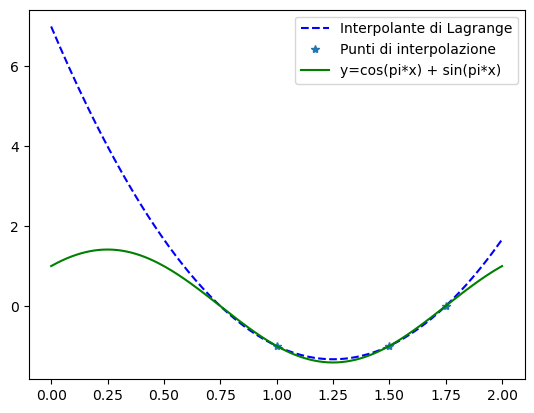

In [17]:
import matplotlib.pyplot as plt

f = lambda x: np.cos(np.pi * x) + np.sin(np.pi * x) #Funzione
x = np.array([1, 1.5, 1.75]) #Nodi in cui calcolare il polinomio interpolante
xx = np.linspace(0, 2, 200) #Intervallo della funzione
ff = interPol(x, f(x), xx) #Calcolo del polinomio interpolante

plt.plot(xx, ff, 'b--', x, f(x), '*', xx, f(xx), 'g-')
plt.legend(['Interpolante di Lagrange','Punti di interpolazione','y=cos(pi*x) + sin(pi*x)'])
plt.show()

si rappresenti in uno stesso grafico la funzione f, il polinomio p e i punti di interpolazione assegnati;

                                                              [2 punti]

 si calcoli il valore assunto dalla funzione errore E(x) := |f(x) − p(x)| nel punto $x^∗$ = 0.75 e si definisca teoricamente da cosa dipende l'errore che si compie quando al posto del polinomio interpolatore si considera la funzione che ha generato i dati, commentando opportunamente la formula
 
                                                             [3 punti]

In [18]:
val = 0.75
err = np.abs(f(val) - interPol(x, f(x), np.array([val])))
print("Errore dell'interpolazione nel valore", val, ": ", err)

Errore dell'interpolazione nel valore 0.75 :  [2.22044605e-16]


si stabilisca qual è il polinomio interpolatore per f passante per i nodi $x^*$ 
, x0, x1 e x2.


                                                            [2 punti]

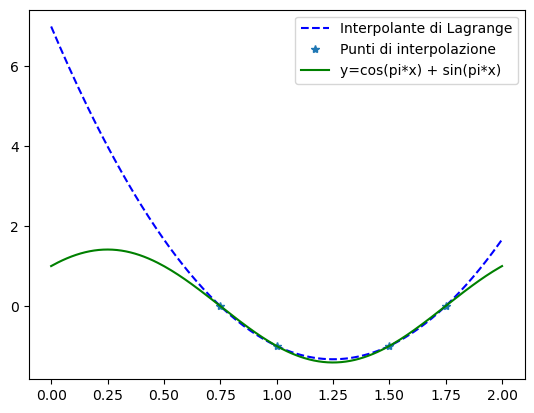

In [19]:
x1 = np.array([val, 1, 1.5, 1.75])
ff1 = interPol(x1, f(x1), xx)

plt.plot(xx, ff1, 'b--', x1, f(x1), '*', xx, f(xx), 'g-')
plt.legend(['Interpolante di Lagrange','Punti di interpolazione','y=cos(pi*x) + sin(pi*x)'])
plt.show()

Si calcoli la costante di Lebesgue e si dica che ruolo svolge nell'ambito dell'interpolazione polinomiale

                                                             [3 punti]

In [20]:
def lebesgueConst(val):
    max_norm = np.max(np.abs(val))
    sum = 0
    for i in range(val.size):
        basis = np.abs(val - val[i])
        sum += np.max(np.sum(basis))
    return sum / max_norm

print(lebesgueConst(ff))

13477.477841468643
